In [ ]:
from IPython.display import Image

# Access google drive and change directory to project folder
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/DadepardazAfagh/TASK2

In [ ]:
# Clone YOLOv7 project and change directory
!git clone https://github.com/augmentedstartups/yolov7.git
%cd yolov7

# Install packages required for YOLOv7
!pip install -r requirements.txt

# Install roboflow library for downloading datasets
!pip install roboflow

###################### IMPORTANT: CHANGES MUST BE MADE #########################
# Because of a bug in YOLOv7 original codes, these changes must be made
#  in "utils/loss.py" to make sure this notebook works properly:
#  
# 1. Change line 685 to:
#  from_which_layer.append((torch.ones(size=(len(b),)) * i).to('cuda'))
#
# 2. Add this before line 757:
#  fg_mask_inboxes = fg_mask_inboxes.to(torch.device('cuda'))
#
# More information:
#  https://stackoverflow.com/questions/74372636/indices-should-be-either-on-cpu-or-on-the-same-device-as-the-indexed-tensor

In [ ]:
# Download pretrained YOLOv7 model
%%bash
wget -P /content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# Download a dataset of lisence plates
# The dataset used here: https://universe.roboflow.com/ml-datasets/iranian-license-plates
from roboflow import Roboflow
rf = Roboflow(api_key=<!!! YOUR API KEY !!!>)
project = rf.workspace("ml-datasets").project("iranian-license-plates")
dataset = project.version(4).download("yolov7")

In [ ]:
# Start training plate detection model
!python train.py --batch 22 --cfg cfg/training/yolov7.yaml --epochs 100 --data /content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/Iranian-License-Plates-4/data.yaml --weights 'yolov7.pt' --device 0

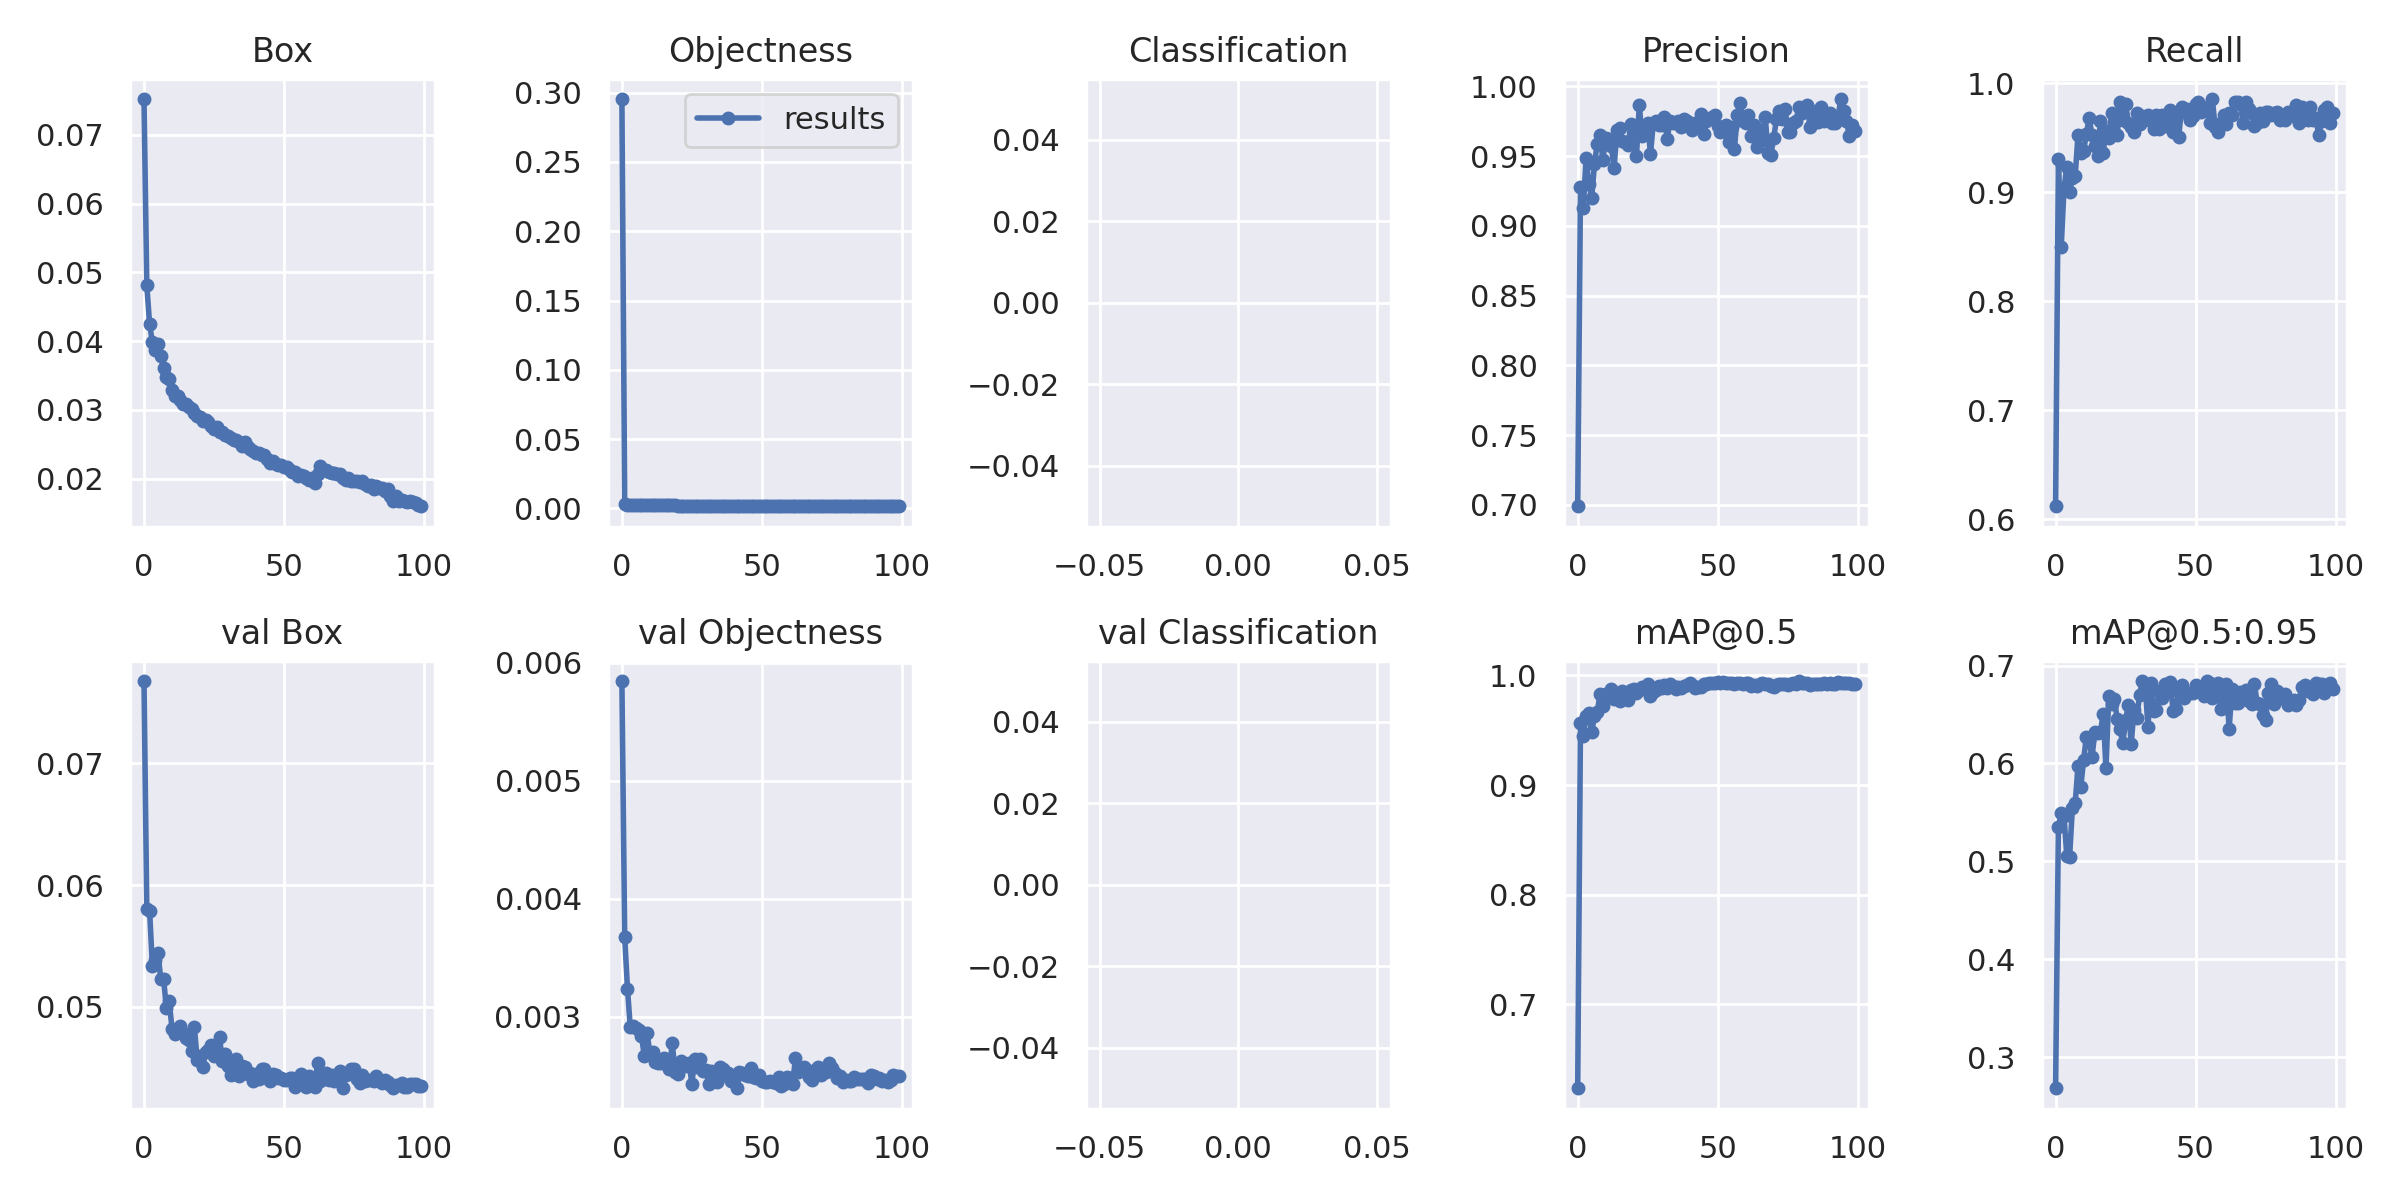

In [ ]:
# Check traning results
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/runs/train/exp11/results.png", width=1200, height=500))

In [ ]:
# Test the model on some images
!python detect.py --weights /content/gdrive/MyDrive/DadepardazAfagh/task2/yolov7/runs/train/exp11/weights/best.pt --conf 0.1 --source /content/gdrive/MyDrive/DadepardazAfagh/task2/yolov7/Iranian-License-Plates-4/test/images

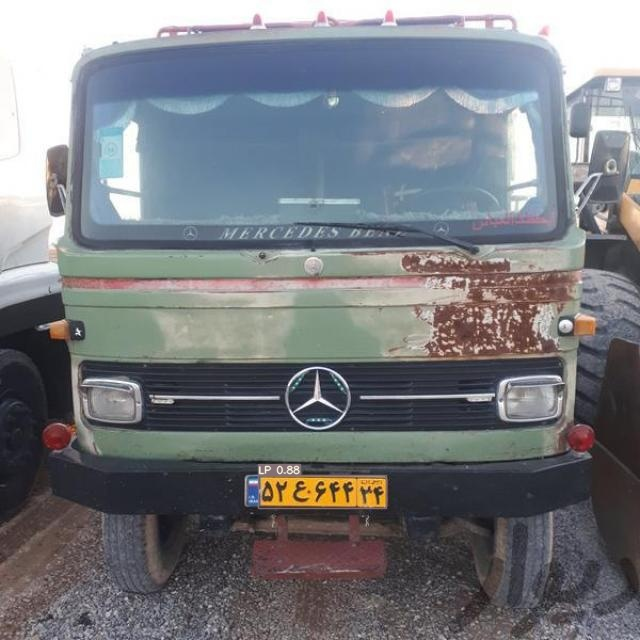

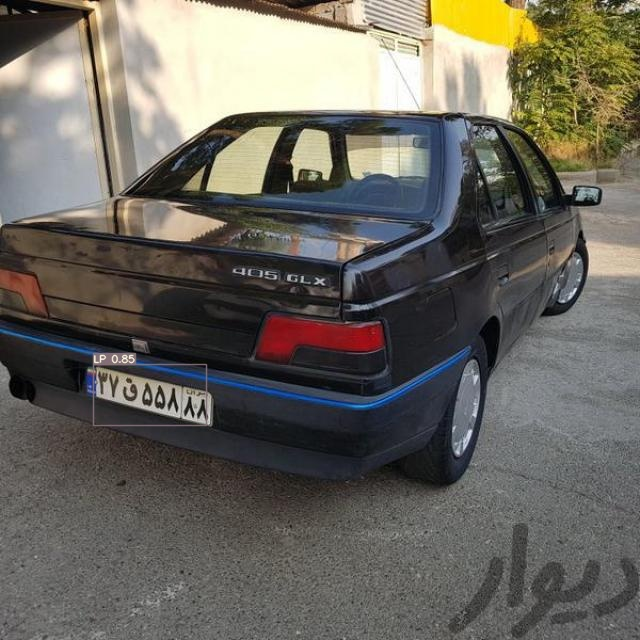

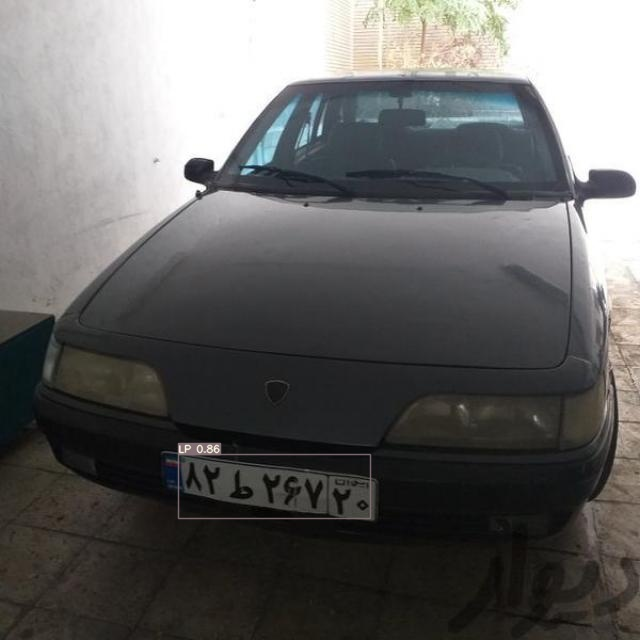

In [ ]:
# Check out the results
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/task2/yolov7/runs/detect/exp/002330_jpg.rf.29fb3735c9cf49626bbb7dd0f23280b6.jpg", width=640, height=640))
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/task2/yolov7/runs/detect/exp/001840_jpg.rf.2847c6b941556b40668769eb9ea062f6.jpg", width=640, height=640))
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/task2/yolov7/runs/detect/exp/001805_jpg.rf.dfca607b2a941cc37c5f848eeeae3e44.jpg", width=640, height=640))

In [ ]:
# Download a dataset of lisence plate characters
# The dataset used here: https://universe.roboflow.com/sinakhoshgoftar/sinaocr
from roboflow import Roboflow
rf = Roboflow(api_key=<!!! YOUR API KEY !!!>)
project = rf.workspace("sinakhoshgoftar").project("sinaocr")
dataset = project.version(1).download("yolov7")

In [ ]:
# Start training OCR model
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --img-size 320 --epochs 100 --data /content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/sinaocr-1/data.yaml --weights 'yolov7.pt' --device 0

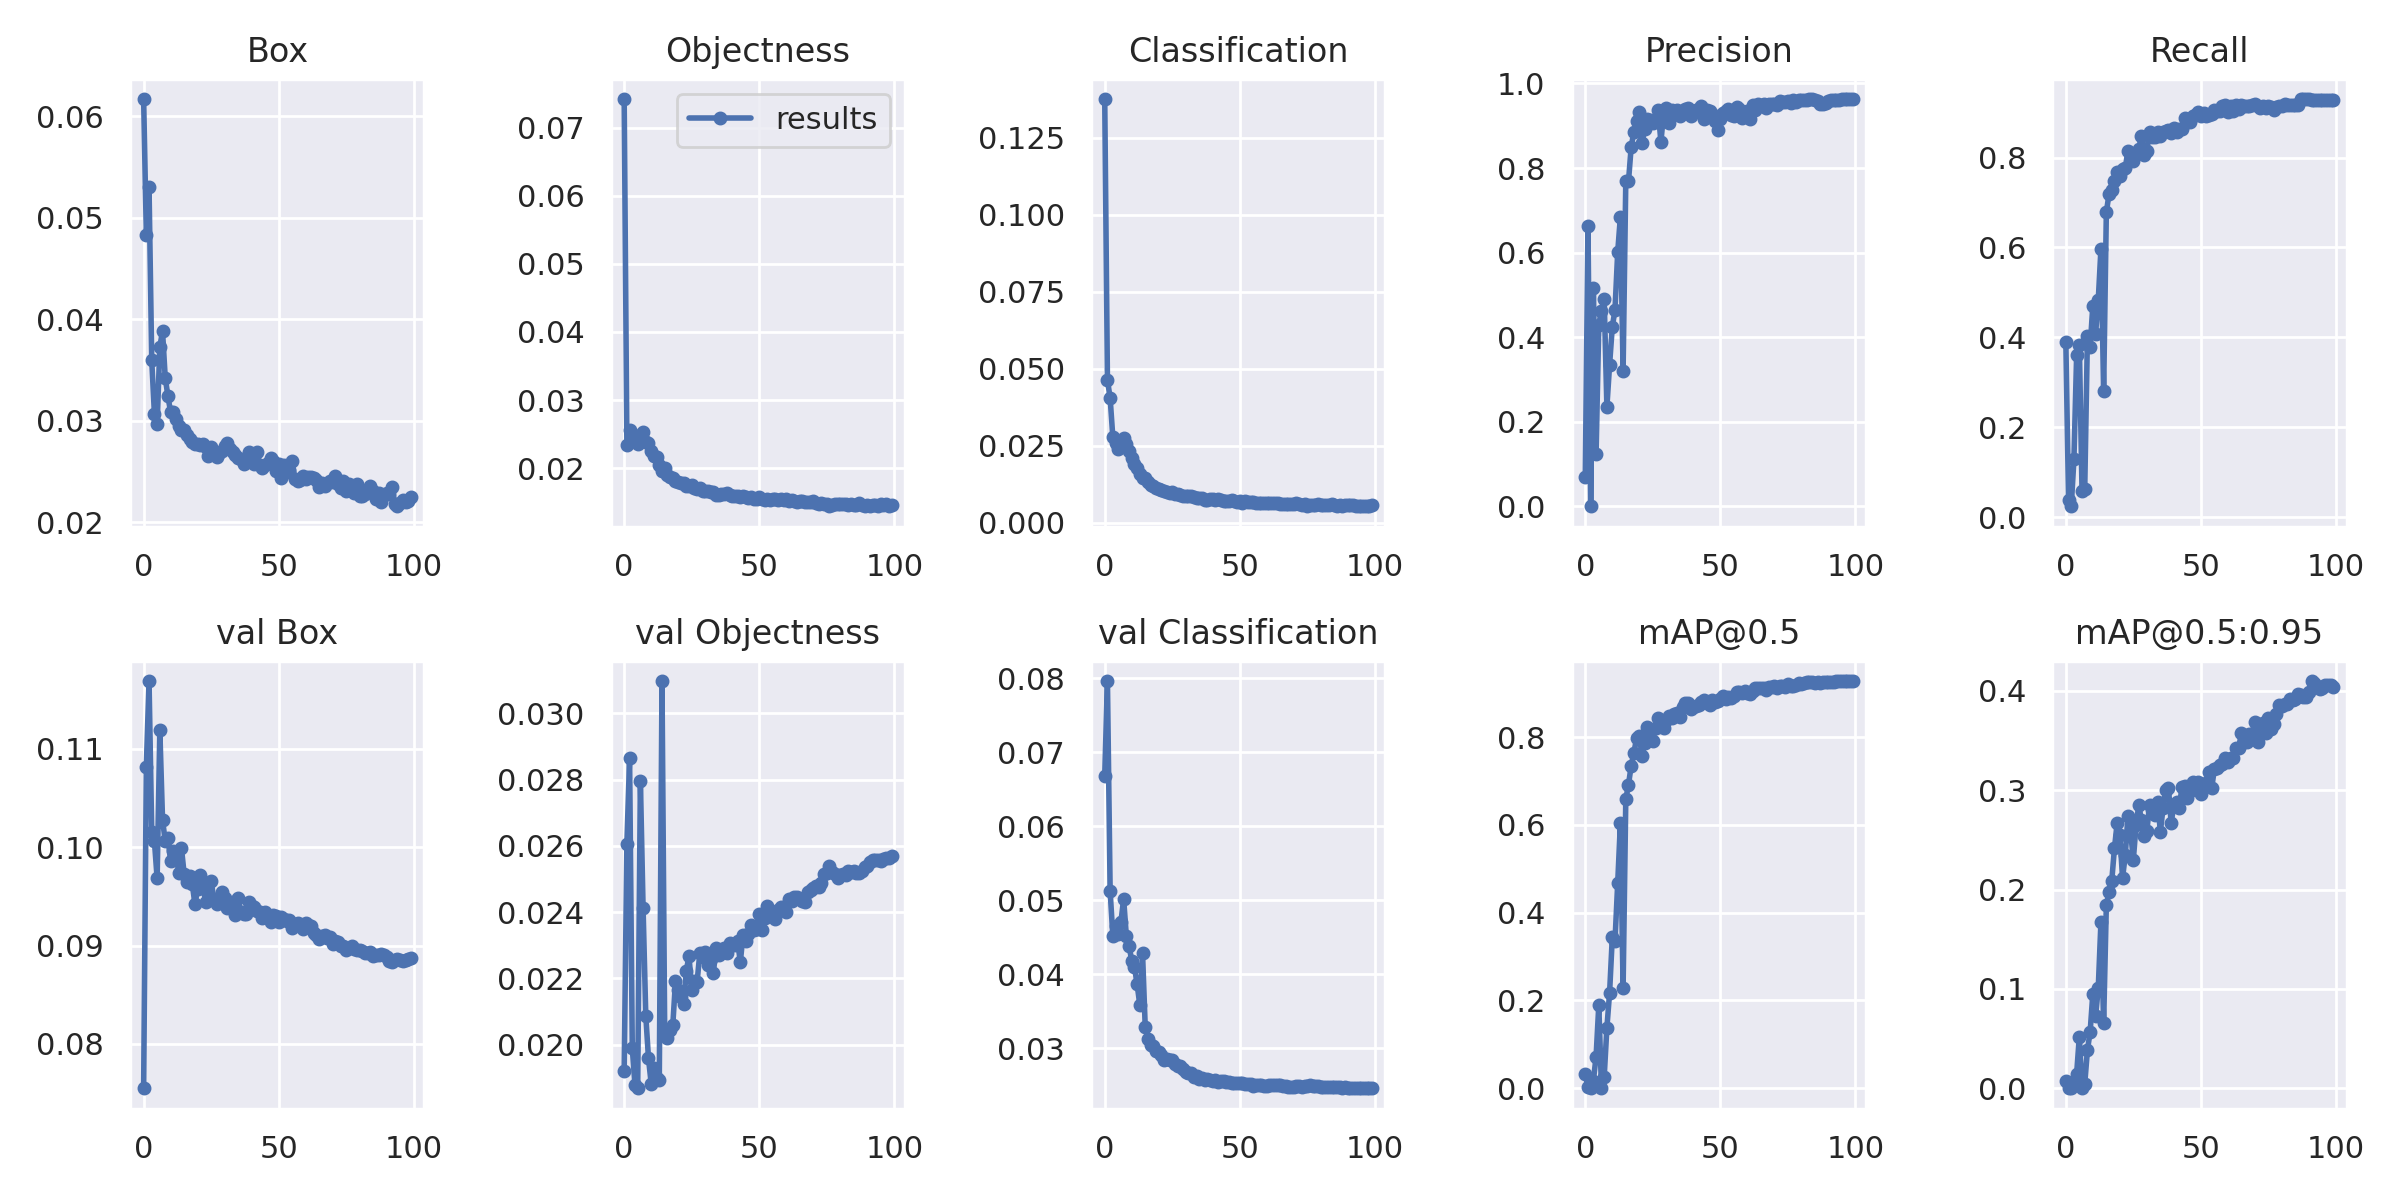

In [ ]:
# Check training results
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/runs/train/exp/results.png", width=1200, height=500))

In [ ]:
# Test the model on some images
!python detect.py --img-size 320 --weights /content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/runs/train/exp/weights/best.pt --conf 0.1 --source /content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/sinaocr-1/test/images

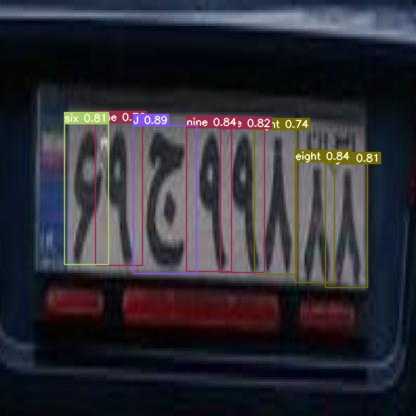

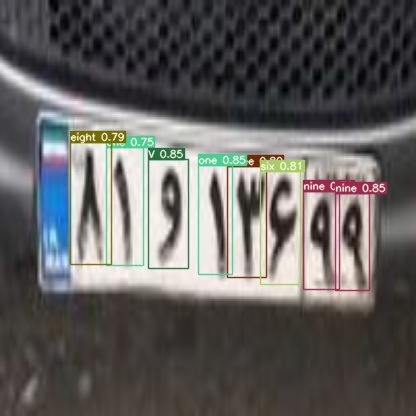

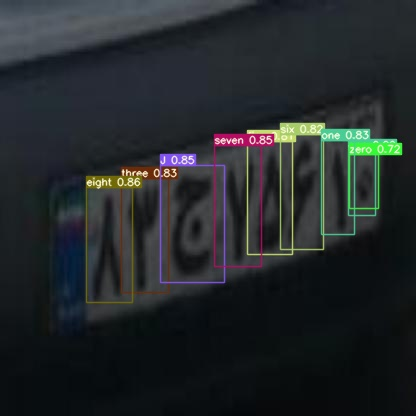

In [ ]:
# Check out the results
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/runs/detect/exp/210_jpg.rf.7db167dc8a05eaea5b78e1d8e1c2d69c.jpg", width=640, height=640))
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/runs/detect/exp/1358_jpg.rf.f04d93c23873081c75fa84804422c705.jpg", width=640, height=640))
display(Image("/content/gdrive/MyDrive/DadepardazAfagh/TASK2/yolov7/runs/detect/exp/1818_jpg.rf.8a0af6114449fddf5a858cf41931073c.jpg", width=640, height=640))